In [96]:
import mne
from pathlib import Path
import pandas as pd
import numpy as np


In [21]:
%matplotlib qt

Extracting EDF parameters from C:\projects\eegnets\ds001787\sub-001\ses-01\eeg\sub-001_ses-01_task-meditation_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 696575  =      0.000 ...  2720.996 secs...


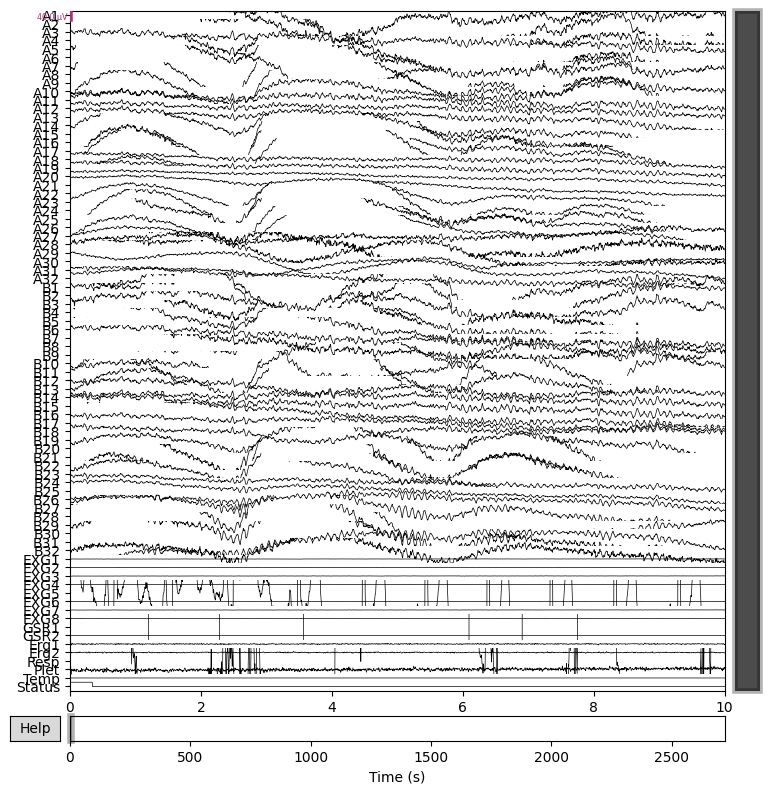

In [142]:
import mne

raw = mne.io.read_raw_bdf(
    r'ds001787\sub-001\ses-01\eeg\sub-001_ses-01_task-meditation_eeg.bdf',
    preload=True
)

raw.plot(duration=10, n_channels=80)


In [143]:
raw_ch = []
for i in raw.ch_names:
    raw_ch.append(i)

print(raw_ch)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


In [144]:
raw.pick_types(eeg=True, eog=False, stim=False, exclude='bads')
print(raw.ch_names)
print(raw.info)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 52.0 Hz
 meas_date: 2014-04-04 19:40:17 UTC
 nchan: 79
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


In [145]:
channels = pd.read_csv('ds001787/task-meditation_channels.tsv', sep = '\t')
channels.head()

,name,type,units
0,Fp1,EEG,microV
1,AF7,EEG,microV
2,AF3,EEG,microV
3,F1,EEG,microV
4,F3,EEG,microV


Channels marked as bad:
none


## Keeping only the 64 EEG channels using the tsv file

I was trying to change the names of the 64 channels to get the correct order while retriving

In [146]:
df_ch = pd.read_csv('ds001787/task-meditation_channels.tsv', sep="\t")

# 3. Extract EEG names
eeg_names = df_ch[df_ch["type"] == "EEG"]["name"].tolist()
assert len(eeg_names) == 64

# 4. Rename A1–B32 → EEG names
rename_map = dict(zip(raw.ch_names[:64], eeg_names))
raw.rename_channels(rename_map)

# 5. DROP non-EEG channels (THIS WAS MISSING)
raw.pick_channels(eeg_names)

# 6. Set montage
raw.set_montage("standard_1020", match_case=False)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 696576 (2721.0 s), ~340.2 MB, data loaded>

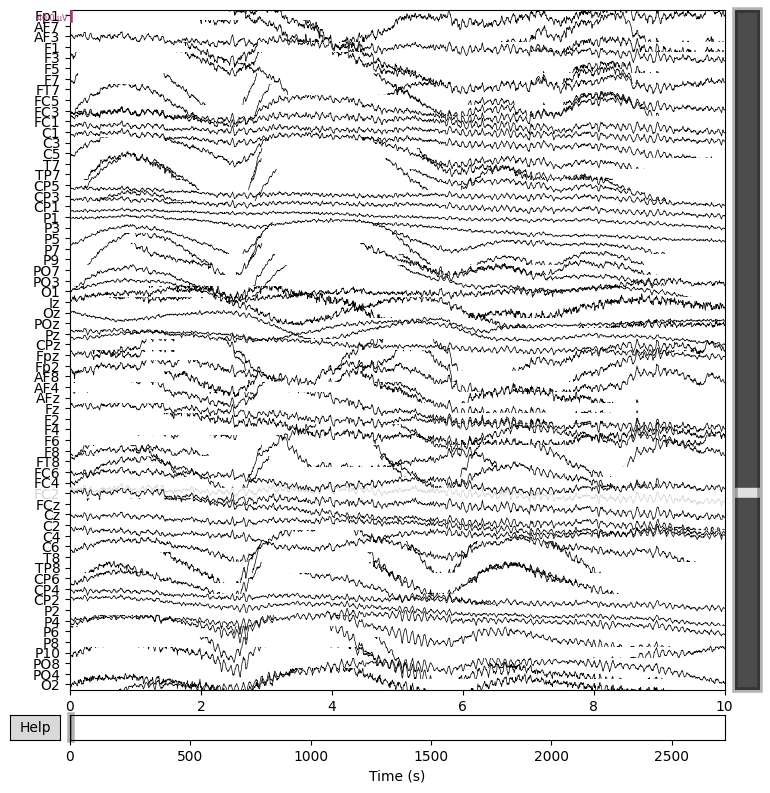

Channels marked as bad:
['FC2']


In [53]:
raw.plot(n_channels = 64, duration = 10)

In [147]:
print(len(raw.ch_names))
print(raw.ch_names)

64
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']


## Data Cleaning

In [148]:
print(raw.times[0], raw.times[-1])
raw.crop(tmin=5.0, tmax=raw.times[-1] - 5.0)
print("*"*64)
print(raw.times[0], raw.times[-1])

0.0 2720.99609375
****************************************************************
0.0 2710.99609375


In [149]:
print(raw.times[-1])

2710.99609375


In [150]:
import pandas as pd

df = pd.read_csv('ds001787/sub-001/ses-01/eeg/sub-001_ses-01_task-meditation_events.tsv', sep="\t")

# get stimulus onsets (value == 128)
probe_times = df.loc[
    (df["trial_type"] == "stimulus") & (df["value"] == 128),
    "onset"
].values

print(probe_times)

[  71.38671875  125.609375    179.80078125  284.859375    362.17578125
  422.69921875  511.1953125   610.55078125  688.87890625  747.796875
  912.6484375   970.21484375  999.11328125 1118.3671875  1252.671875
 1330.38671875 1497.2109375  1587.796875   1735.734375   1882.98046875
 2037.25       2091.46484375 2240.66015625 2297.625      2387.9609375
 2477.16015625 2589.13671875 2645.671875  ]


In [151]:
TRIM = 5.0  # seconds

meditation_windows = []

for i in range(len(probe_times) - 1):
    start = probe_times[i] + TRIM
    end   = probe_times[i + 1] - TRIM

    # keep only meaningful windows
    if end > start:
        meditation_windows.append((start, end))


clean_segments = []

for start, end in meditation_windows:
    seg = raw.copy().crop(tmin=start, tmax=end)
    if seg.times[-1] > 1.0:  # at least 1 second
        clean_segments.append(seg)

raw_clean = mne.concatenate_raws(clean_segments)


<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 589924 (2304.4 s), ~288.1 MB, data loaded>


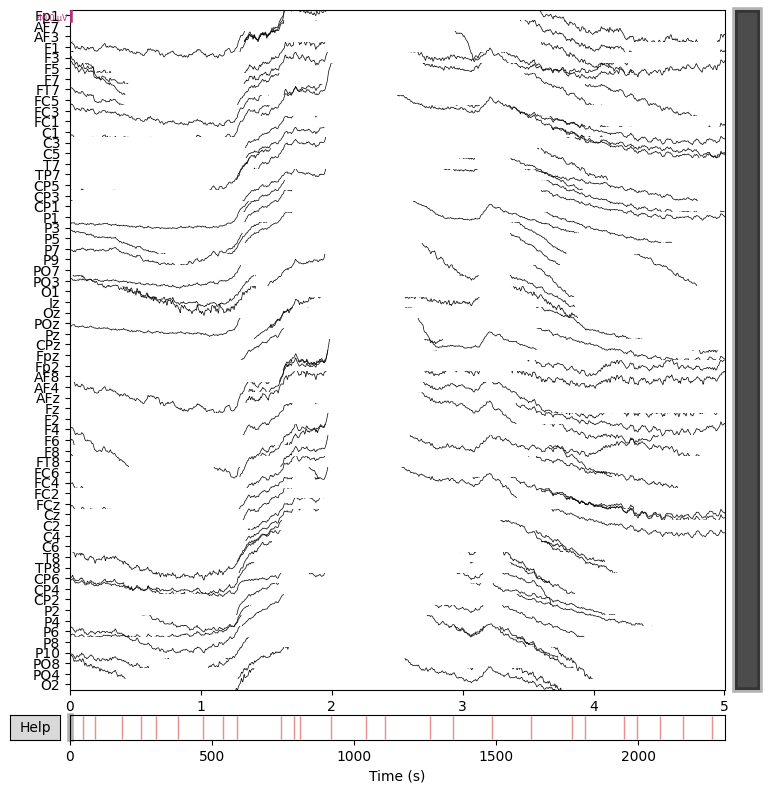

Channels marked as bad:
none


In [120]:
print(raw_clean)
raw_clean.plot(n_channels=64, duration= 5)

### Resampling


In [152]:
TARGET_SFREQ = 256

if int(raw_clean.info["sfreq"]) != TARGET_SFREQ:
    raw_clean.resample(TARGET_SFREQ, npad="auto")


### Band Pass filtering

In [153]:
raw_clean.filter(
    l_freq=1.0,
    h_freq=40.0,
    fir_design="firwin",
    verbose=False
)

<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 589924 (2304.4 s), ~288.1 MB, data loaded>

### Notch Filtering

In [154]:
raw_clean.notch_filter(
    freqs=[50],
    fir_design="firwin",
    verbose=False
)

<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 589924 (2304.4 s), ~288.1 MB, data loaded>

In [155]:
raw_clean.set_eeg_reference("average", verbose=False)

<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 589924 (2304.4 s), ~288.1 MB, data loaded>

## Windowing

In [ ]:
WINDOW_SEC = 10.0
OVERLAP = 0.5   # 50%
STEP_SEC = WINDOW_SEC * (1 - OVERLAP)

sfreq = raw_clean.info["sfreq"]
win_samples  = int(WINDOW_SEC * sfreq)
step_samples = int(STEP_SEC * sfreq)

X_windows = []

data = raw_clean.get_data()  # shape: (C, T)
n_chans, n_times = data.shape

start = 0
while start + win_samples <= n_times:
    window = data[:, start:start + win_samples]  # (C, T_window)
    X_windows.append(window)
    start += step_samples

X_windows = np.stack(X_windows)  # (N, C, T)


print("Number of windows:", X_windows.shape[0])
print("Window shape:", X_windows.shape[1:])
print(X_windows.shape)

raw_clean.plot(duration=10, n_channels=32)

**EEG recordings were resampled to 256 Hz, band-pass filtered between 1–40 Hz, and notch filtered at 50 Hz to remove power-line noise. After removing noisy transition periods, continuous meditation EEG was segmented into 10-second windows with 50% overlap for subsequent analysis.**

## Labeling the data (WINDOW LEVEL LABELING)
0 = Mind Wandering


1 = Focused Attention


**Rules:**
1. If Q1 > Q2  → Focused Attention (label = 1)
2. If Q2 > Q1  → Mind Wandering   (label = 0)
3. If Q1 == Q2 → discard this probe

After preprocessing, the continuous EEG was segmented into 10-second windows with 50% overlap. Each window was labeled using experience-sampling probes. Windows fully contained within −30 to −5 seconds before a probe onset were assigned the probe’s label based on the comparison of focused-attention and mind-wandering ratings. Windows outside probe-defined intervals or associated with ambiguous responses were discarded.

In [163]:
sfreq = raw_clean.info["sfreq"]

WINDOW_SEC = 10.0
STEP_SEC   = 5.0     # 50% overlap

win_samples  = int(WINDOW_SEC * sfreq)
step_samples = int(STEP_SEC * sfreq)

In [165]:
N_windows = X_windows.shape[0]

window_starts = np.arange(N_windows) * STEP_SEC
window_ends   = window_starts + WINDOW_SEC

In [167]:
LABEL_TMIN = -30.0
LABEL_TMAX = -5.0

In [168]:
y_windows = np.full(N_windows, fill_value=-1, dtype=int)
# -1 means "unlabeled / discard"

for _, row in labels_df.iterrows():
    t_probe = row["probe_time"]
    label   = row["label"]

    label_start = t_probe + LABEL_TMIN
    label_end   = t_probe + LABEL_TMAX

    for i in range(N_windows):
        w_start = window_starts[i]
        w_end   = window_ends[i]

        # window must be fully inside probe labeling interval
        if (w_start >= label_start) and (w_end <= label_end):
            y_windows[i] = label

In [170]:
valid_idx = y_windows != -1

X_labeled = X_windows[valid_idx]
y_labeled = y_windows[valid_idx]

In [171]:
print("Final X shape:", X_labeled.shape)
print("Final y shape:", y_labeled.shape)
print("Label distribution:", np.unique(y_labeled, return_counts=True))

Final X shape: (42, 64, 2560)
Final y shape: (42,)
Label distribution: (array([0, 1]), array([21, 21], dtype=int64))


After preprocessing, the continuous EEG was segmented into 10-second windows with 50% overlap. Each window was labeled using experience-sampling probes. Windows fully contained within −30 to −5 seconds before a probe onset were assigned the probe’s label based on the comparison of focused-attention and mind-wandering ratings. Windows outside probe-defined intervals or associated with ambiguous responses were discarded.

## Plots

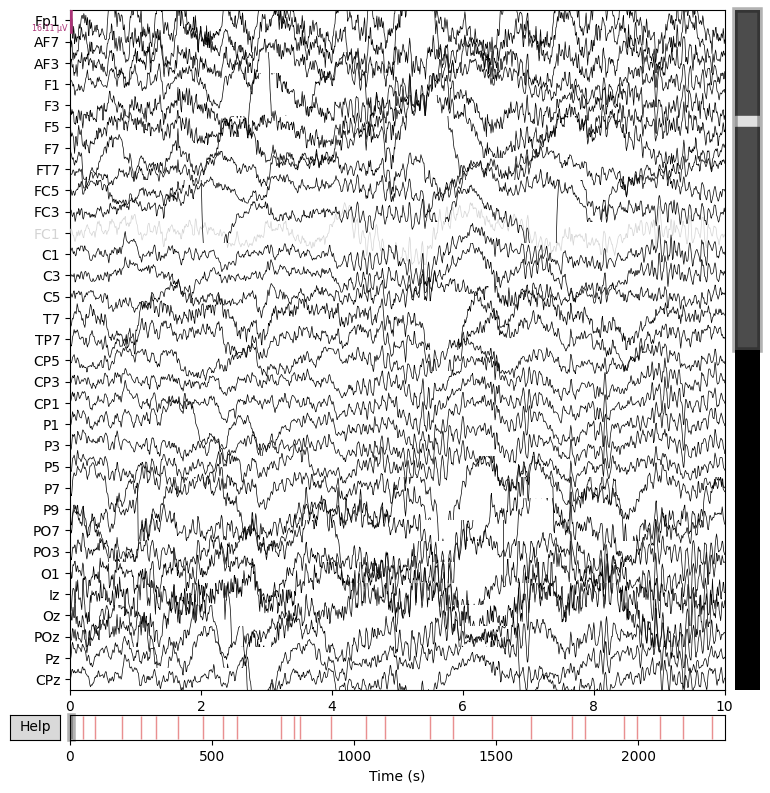

Channels marked as bad:
['FC1']


In [172]:
import mne

# Plot 10 seconds of cleaned EEG
raw_clean.plot(
    duration=10,
    n_channels=32,
    scalings="auto",
    title="Cleaned EEG (Sub-001, Ses-01)"
)


In [175]:
labels_table.to_csv(
    "sub-001_ses-01_window_level_labels.csv",
    index=False
)


In [181]:
%matplotlib inline

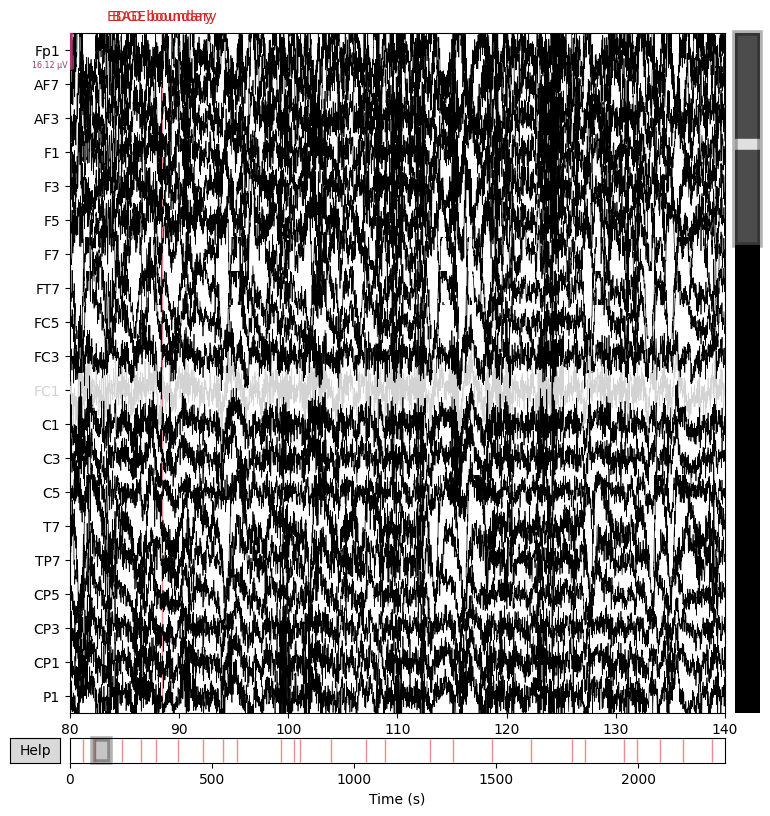

In [186]:
fig = raw_clean.plot(
    duration=60,
    start=80,
    n_channels=20,
    scalings="auto",
    title="Cleaned EEG with Probe Locations",
    show=False
)

plt.show()


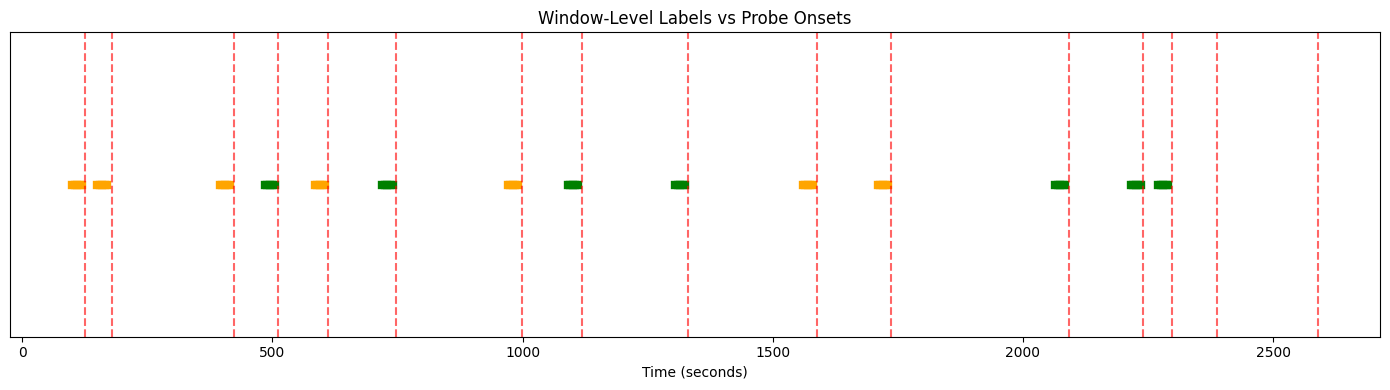

In [187]:
plt.figure(figsize=(14, 4))

# Plot labeled windows
for _, r in labels_table.iterrows():
    color = "green" if r["label"] == 1 else "orange"
    plt.plot(
        [r["start_time_sec"], r["end_time_sec"]],
        [1, 1],
        color=color,
        linewidth=6
    )

# Plot probe onsets
for t in labels_df["probe_time"]:
    plt.axvline(t, color="red", linestyle="--", alpha=0.6)

plt.yticks([])
plt.xlabel("Time (seconds)")
plt.title("Window-Level Labels vs Probe Onsets")
plt.tight_layout()
plt.show()


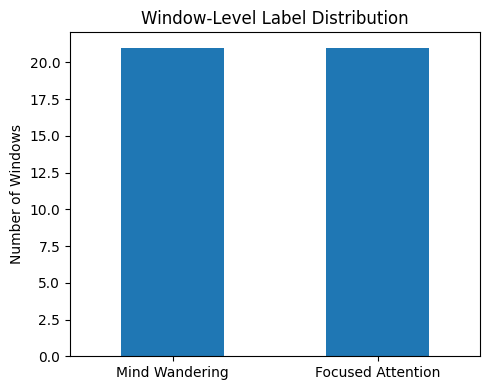

In [189]:
# y_labeled contains window-level labels (0/1)
label_names = {0: "Mind Wandering", 1: "Focused Attention"}

label_counts = pd.Series(y_labeled).map(label_names).value_counts()

plt.figure(figsize=(5, 4))
label_counts.plot(kind="bar")
plt.ylabel("Number of Windows")
plt.title("Window-Level Label Distribution")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


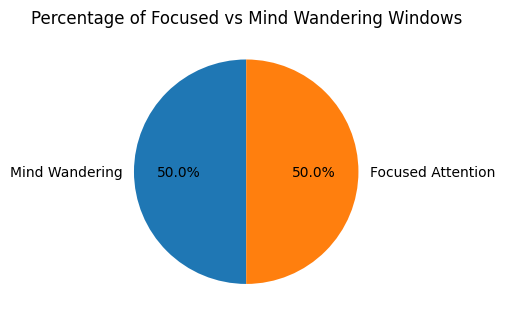

In [191]:
plt.figure(figsize=(5, 5))
label_counts.plot(
    kind="pie",
    autopct="%.1f%%",
    startangle=90
)
plt.ylabel("")
plt.title("Percentage of Focused vs Mind Wandering Windows")
plt.tight_layout()
plt.show()


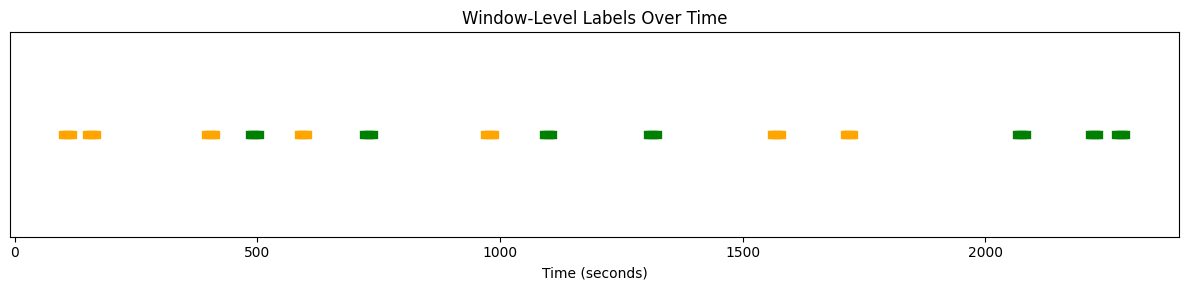

In [ ]:
plt.figure(figsize=(12, 3))

colors = {0: "orange", 1: "green"}

for _, r in labels_table.iterrows():
    plt.plot(
        [r["start_time_sec"], r["end_time_sec"]],
        [1, 1],
        color=colors[r["label"]],
        linewidth=6
    )

plt.yticks([])
plt.xlabel("Time (seconds)")
plt.title("Window-Level Labels Over Time")
plt.tight_layout()
plt.show()